# Jelfeldolgozási módszerek Pythonban

# "Adjatok egy ssh logint és **én kifordítom sarkaiból a világot."**

Az egyetemi, kutató munka során rengeteg szoftverrel dolgozunk, amelyekhez biztosítva van a hozzáférés oktatási, tanulási vagy esetleg kutatási licenszek alapján. Ezek a hozzáférések azonban nem garantáltak (lásd Elsevier balhét pár éve), főleg ha esetleg megfordul a fejünkben a vállalkozás indításának gondolata.

A világ javarészt ingyenes és nyílt forráskódú (Free and Open Source Software) szoftverek vállán nyugszik, gondoljunk csak a szervertermekben üzemelő Linux OS-ekre, különböző programozási nyelvekre, fejlesztői csomagokra. Ezzel szemben a fizetős szolgáltatások általában egyszerűbb működést, általában nagyobb megbízhatóságot és kiterjedtebb támogatást ígérnek, így egyszerűsítve felhasználó életét, hogy csak a munkájával kelljen törődnie.

Ebben a dokumentumban szeretnék egy kis ízelítőt adni a jelfeldolgozási problémák Python programnyelvvel való megoldásával. A használathoz csupán egy számítógép hardverre van szükségünk ugyanis ez az egyik teljesen multiplatform nyelv, így Linuxon is haszálható.

Térítés vége, vágjunk bele!

# Conda konténerkezelő

Ha sokféle csomagot telepítünk a Python installációnkhoz, azok a különböző igények miatt összeakadhatnak. Ennek elkerülése érdekében érdemes úgynevezett environmentekbe elszeparálni az éppen szükséges package-ket. Telepítsük az Anaconda csomagkezelőt, aztán hozzunk létre egy új environmentet, majd nyissuk meg a terminalt vagy a parancssort, és rakjuk fel a szükséges csomagokat:

```bash
conda install python=3.9 scipy numpy matplotlib
```

Ezen túl telepítsük a juypter programot az Anaconda GUI-n keresztül. Nyissuk meg ezt a dokumentumot a jupyterrel és a létrehozott, feltelepített environmenttel.

# Matplotlib

A pythonban a matplotlib nevű plottoló csomagot használjuk, többféle módon is használható, az egyik viszont direkt hajaz a MatLab-féle szintaxisra.

Hívjuk be a modult, és állítsunk be egy alapértelmezett plotméretet és felbontást:

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.dpi'] = 100

Rajzoljunk ki egy adott időjárás görbét. Létrehozzuk a dátum tömböt, majd az érték tömböt és plottoljuk:

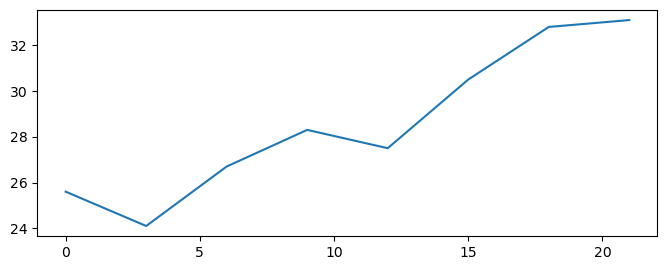

In [2]:
days = list(range(0, 22, 3))
celsius_values = [25.6, 24.1, 26.7, 28.3, 27.5, 30.5, 32.8, 33.1]
plt.plot(days, celsius_values)

Rajzoljunk egy szinusz jelet, amihez használjuk a Numpy tömbszerkezetét:

In [3]:
f = 10  # szinusz frekvencia HZ
f_s = 100  # mintavételezés frekvencia HZ

In [4]:
import numpy as np
t = np.linspace(0, 2, 2 * f_s, endpoint=True) #0-2 s, felbontás Nyquist kritérium szerint
x = np.sin(f * 2 * np.pi * t)

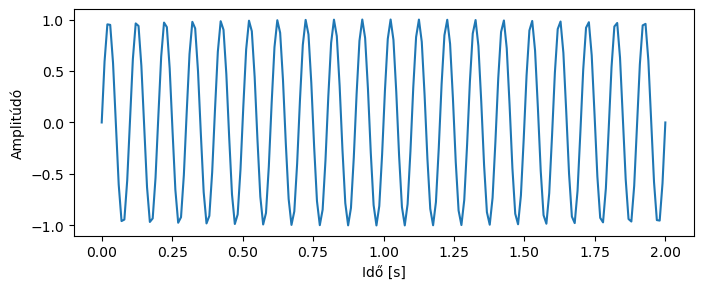

In [5]:
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Idő [s]')
ax.set_ylabel('Amplitúdó');

Kicsit cicomázzuk ki, hogy publikációba kerülhessen a következő beállításokkal:

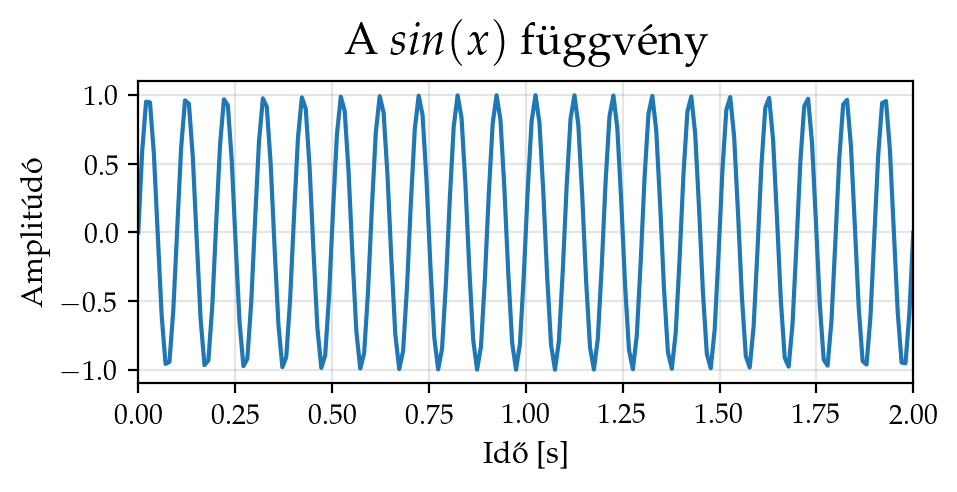

In [6]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

fig, ax = plt.subplots(figsize=(5,2), dpi=200)
ax.plot(t, x)
ax.set_xlabel(r'Idő [s]', fontsize=11)
ax.set_ylabel(r'Amplitúdó', fontsize=11)
ax.set_title('A $sin(x)$ függvény', fontsize=16, pad=10)
ax.set_xlim(0,2)
ax.grid(color='gray',alpha=0.2)
fig.savefig("sinx.svg")

Visszatérünk az alapértelmezett grafikai beállításokhoz:

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = [8, 3]
plt.rcParams['figure.dpi'] = 100

# Scipy

A tudományos számításokhoz létrehozták a scipy nevű programcsomagot, amely széleskörű függvéngyűjteményével lefedi valamennyi tudományterület igényeit. Természetesen, minden területen találhatóak specifikusabb csomagok (pl. astropy, sympy, biopython, stb.). A scipy többek között tartalmaz egy jelfeldolgozós scipy.signal, és Fourier transzformációs scipy.fft csomagot is.

In [8]:
from scipy import fftpack
from scipy import signal

# Fourier analízis


In [9]:
t = np.linspace(0, 2, 2 * f_s, endpoint=True) #0-2 s, felbontás Nyquist kritérium szerint
x = np.sin(f * 2 * np.pi * t)
X=fftpack.fft(x)
freq=fftpack.fftfreq(len(x),(np.max(t)-np.min(t))/(len(t)))

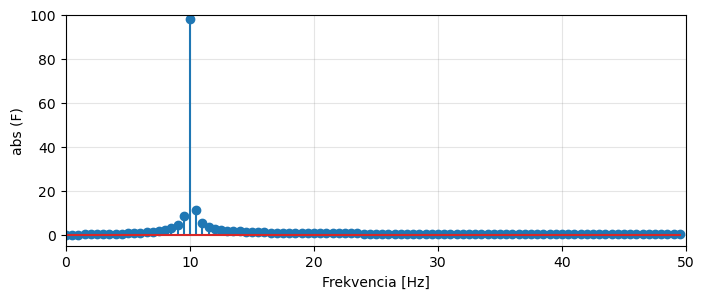

In [11]:
fig, ax = plt.subplots()
ax.stem(freq, np.abs(X))
ax.set_xlabel('Frekvencia [Hz]')
ax.set_ylabel('abs (F)')
ax.set_xlim(0, 50)
ax.set_ylim(-5, 100)
ax.grid(color='grey', alpha=0.2)

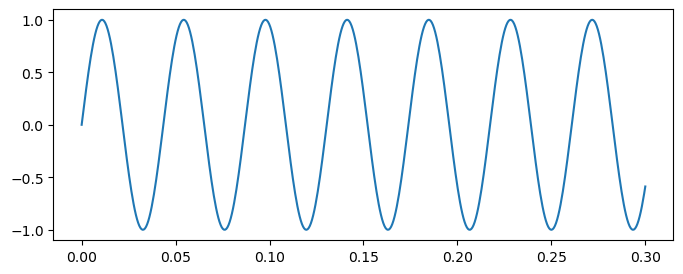

In [13]:
t = np.linspace(0, 0.3,500, endpoint=True)
x = 1*np.sin(23 * 2 * np.pi * t)+0.00001*np.sin(200*2*np.pi*t)
X=fftpack.fft(x)
freq=fftpack.fftfreq(len(x),(np.max(t)-np.min(t))/(len(t)))
plt.plot(t,x)

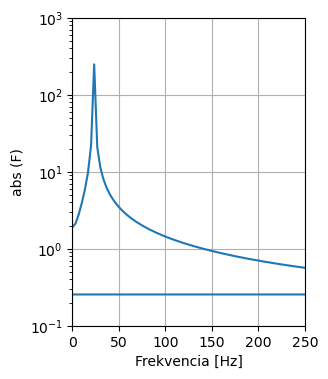

In [14]:
fig, ax = plt.subplots(figsize=(3,4), dpi=100)
ax.plot(freq, np.abs(X))
ax.set_xlabel('Frekvencia [Hz]')
ax.set_ylabel('abs (F)')
ax.set_xlim(0, 250)
ax.set_ylim(0.1, 1000)
ax.set_yscale('log')
ax.grid()

Text(0.5, 0, 'Minta')

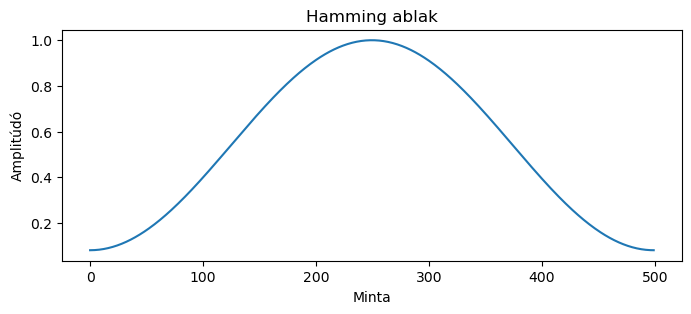

In [15]:
window=signal.windows.hamming(len(t))
plt.plot(window)
plt.title("Hamming ablak")
plt.ylabel("Amplitúdó")
plt.xlabel("Minta")

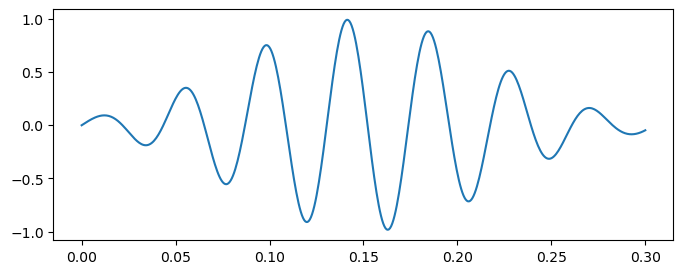

In [16]:
x2=x*window
plt.plot(t,x2)

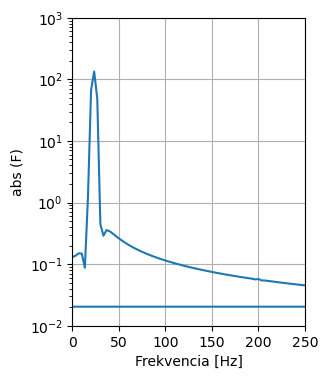

In [17]:
X=fftpack.fft(x2)
freq=fftpack.fftfreq(len(x),(np.max(t)-np.min(t))/(len(t)))
fig, ax = plt.subplots(figsize=(3,4), dpi=100)
ax.plot(freq, np.abs(X))
ax.set_xlabel('Frekvencia [Hz]')
ax.set_ylabel('abs (F)')
ax.set_xlim(0, 250)
ax.set_ylim(1e-2, 1000)
ax.set_yscale('log')
ax.grid()

In [18]:
window=signal.windows.hann(len(t))
x2=x*window

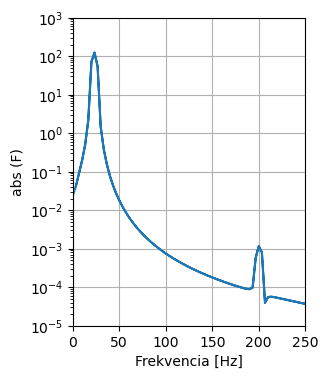

In [19]:
X=fftpack.fft(x2)
freq=fftpack.fftfreq(len(x),(np.max(t)-np.min(t))/(len(t)))
fig, ax = plt.subplots(figsize=(3,4), dpi=100)
ax.plot(abs(freq), np.abs(X))
ax.set_xlabel('Frekvencia [Hz]')
ax.set_ylabel('abs (F)')
ax.set_xlim(0, 250)
ax.set_ylim(1e-5, 1000)
ax.set_yscale('log')
ax.grid()

# Jelgenerátorok

In [20]:
t = np.linspace(0, 2, 1000, endpoint=True)
chirp = signal.chirp(t, f0=10, f1=40, t1=1, method='linear') # f0-frekvencia t=0ban, f1-frekvencia t1ben, lineáris söprés

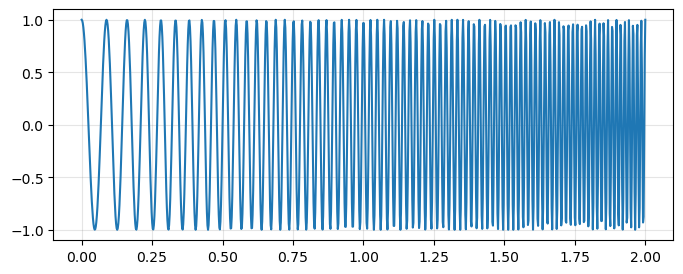

In [21]:
fig,ax=plt.subplots()
ax.plot(t,chirp)
ax.grid(color='gray', alpha=0.2)

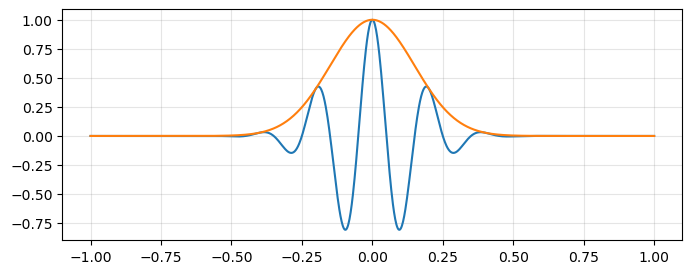

In [22]:
t = np.linspace(-1, 1, 1000, endpoint=True)
gauss, e=signal.gausspulse(t, fc=5, bw=0.5, bwr=- 6, tpr=- 60, retenv=True)
fig,ax=plt.subplots()
ax.plot(t,gauss,t,e)
ax.grid(color='gray', alpha=0.2)

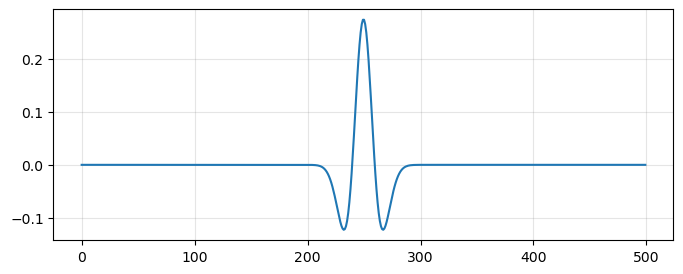

In [23]:
mk = signal.ricker(500, 10)
fig,ax=plt.subplots()
ax.plot(mk)
ax.grid(color='gray', alpha=0.2)

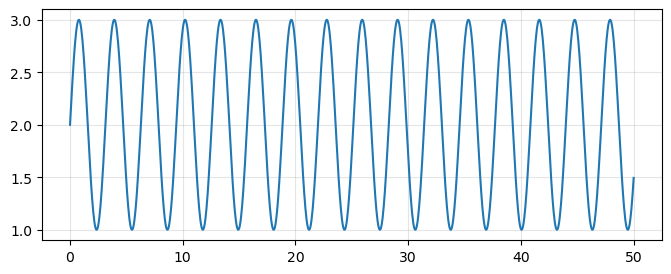

In [24]:
t = np.linspace(0, 50, 1000, endpoint=True)
x=2+np.sin(2*t)
fig,ax=plt.subplots()
ax.plot(t,x)
ax.grid(color='gray', alpha=0.2)

(0.0, 500.0)

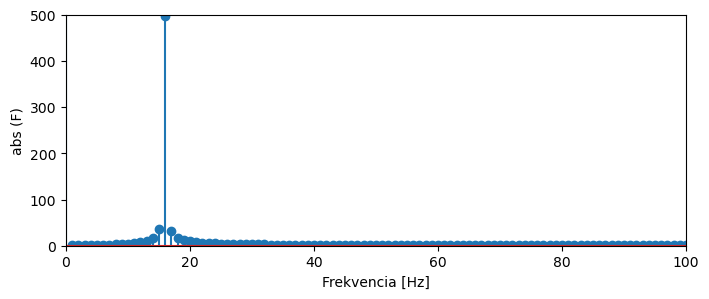

In [25]:
X=fftpack.fft(x)
freq=fftpack.fftfreq(len(x))*len(t)
fig, ax = plt.subplots()
ax.stem(freq, np.abs(X))
ax.set_xlabel('Frekvencia [Hz]')
ax.set_ylabel('abs (F)')
ax.set_xlim(0, 100)
ax.set_ylim(0, 500)

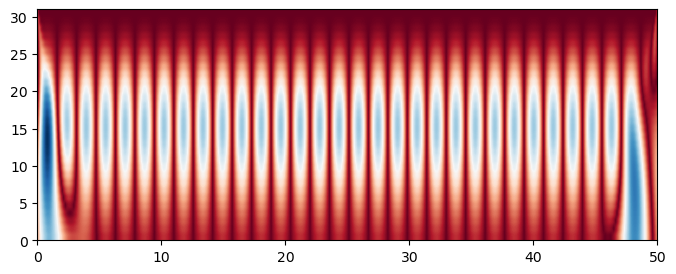

In [26]:
a=31
widths = np.arange(1,a)
cwtmatr = signal.cwt(x, signal.ricker, widths)
plt.imshow(abs(cwtmatr), extent=[0, max(t), 0, a], cmap='RdBu', aspect='auto')

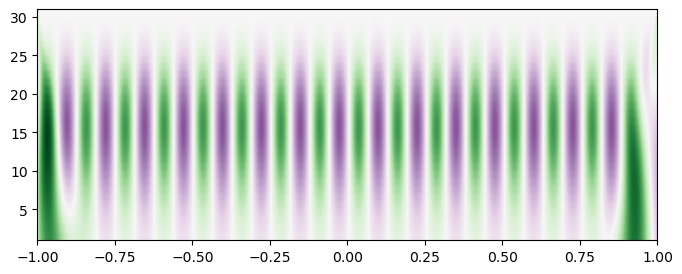

In [27]:
import pywt
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(x, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show() # doctest: +SKIP

In [ ]:
sig = signal.chirp(t, f0=500, f1=250, t1=2, method='quadratic')

In [ ]:
fig,ax=plt.subplots()
ax.plot(t,sig, ),
ax.grid(color='lightgray')

In [ ]:
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='RdBu', aspect='auto')